In [63]:
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


## Importing libraries

In [71]:
pip install opencv-python

  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [75]:
import os
import pandas as pd 
import numpy as np
import glob as gb 
import matplotlib.pyplot as plt
import skimage
from skimage import filters
from pathlib import Path
from PIL import Image
import xml.etree.ElementTree as ET
from skimage.color import rgb2gray
import cv2 as cv

## Getting the feel of data

In [6]:
tree_t = ET.parse('C:/Users/shahe/Downloads/Rowan/Data_Science/4th_Semester/DM/Assignments/Programing1/annotation/n02099712-Labrador_retriever/n02099712_57.xml')
root_t = tree_t.getroot()

In [7]:
print(root_t.tag)
root_t.attrib

annotation


{}

In [8]:
for child in root_t:
    print(child.tag, child.attrib)

folder {}
filename {}
source {}
size {}
segment {}
object {}


In [9]:
root_t[5][4][0].text

'76'

### checking the code for finding bounding box information for one file

In [10]:
bbox_t = []
for child in root_t.findall('object'):
    bndbox_t = child.find('bndbox')
    xmin_t = int(bndbox_t.find('xmin').text)
    ymin_t = int(bndbox_t.find('ymin').text)
    xmax_t = int(bndbox_t.find('xmax').text)
    ymax_t = int(bndbox_t.find('ymax').text)
    bbox_t.append((xmin_t, xmax_t, ymin_t, ymax_t))

print("Bounding boxes of the images are -", bbox_t)

Bounding boxes of the images are - [(76, 435, 32, 333)]


## Q2a

In [11]:
# saving data in a variable
dog_img = gb.glob('C:/Users/shahe/Downloads/Rowan/Data_Science/4th_Semester/DM/Assignments/Programing1/images/*/*') 
annotations = gb.glob('C:/Users/shahe/Downloads/Rowan/Data_Science/4th_Semester/DM/Assignments/Programing1/annotation/*/*')

print(len(dog_img), len(annotations))


677 677


In [13]:
dog_img[0]

'C:/Users/shahe/Downloads/Rowan/Data_Science/4th_Semester/DM/Assignments/Programing1/images\\n02099712-Labrador_retriever\\n02099712_1150.jpg'

### Making functions 

In [ ]:
bou

In [28]:

# function to get the bounding box coordinates
def bounding_b(annot):
    x = annot
    tree = ET.parse(x)
    root  = tree.getroot()
    bbox =[]
    for child in root.findall('object')[0].findall('bndbox')[0]:
        bbox.append(int(child.text))
    
    return bbox


        

In [19]:
annotations[0],dog_img[0]

('C:/Users/shahe/Downloads/Rowan/Data_Science/4th_Semester/DM/Assignments/Programing1/annotation\\n02099712-Labrador_retriever\\n02099712_1150',
 'C:/Users/shahe/Downloads/Rowan/Data_Science/4th_Semester/DM/Assignments/Programing1/images\\n02099712-Labrador_retriever\\n02099712_1150.jpg')

## Cropping & resizing images

In [27]:
print(img.crop.__doc__)


        Returns a rectangular region from this image. The box is a
        4-tuple defining the left, upper, right, and lower pixel
        coordinate. See :ref:`coordinate-system`.

        Note: Prior to Pillow 3.4.0, this was a lazy operation.

        :param box: The crop rectangle, as a (left, upper, right, lower)-tuple.
        :rtype: :py:class:`~PIL.Image.Image`
        :returns: An :py:class:`~PIL.Image.Image` object.
        


In [44]:
for image_filename,annotation_filename in zip(dog_img,annotations):
    bbox = bounding_b(annotation_filename)
    img = Image.open(image_filename)
    cropped_image = img.crop(box=bbox)
    resized_image = cropped_image.resize((128,128))
    new_dir = "/".join(image_filename.split("\\")[:-1])
    new_dir = new_dir.replace("images","resized")
    if not os.path.exists(new_dir):
        os.mkdir(new_dir)
    resized_image.save(image_filename.replace("images","resized"))

# Q2b

In [55]:
resized_classes = gb.glob('C:/Users/shahe/Downloads/Rowan/Data_Science/4th_Semester/DM/Assignments/Programing1/resized/*')
resized_images = gb.glob(resized_classes[0]+"/*")[:2] + gb.glob(resized_classes[1]+"/*")[:2]+gb.glob(resized_classes[2]+"/*")[:2]+gb.glob(resized_classes[3]+"/*")[:2]

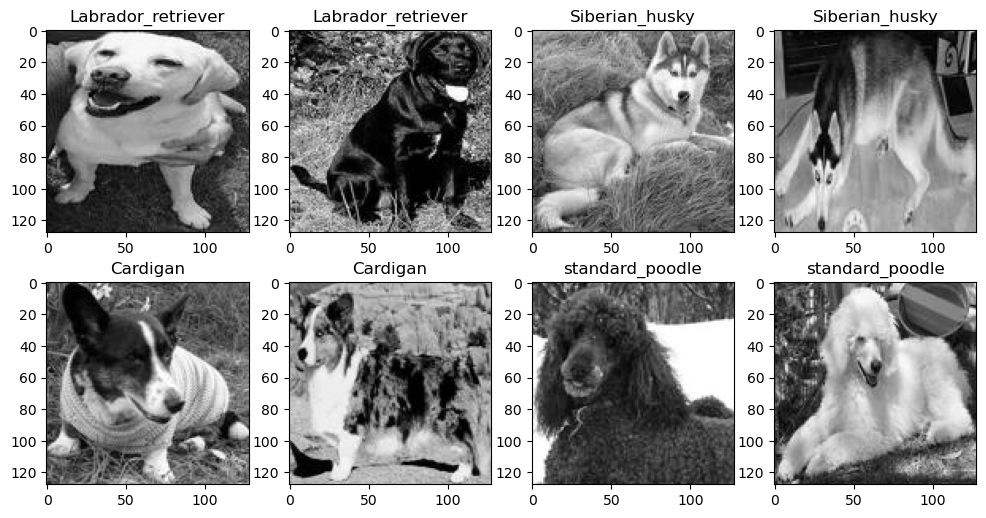

In [73]:
fig, axes = plt.subplots(2,4, figsize=(12,6))
for ax, filename in zip(axes.flat,resized_images):
    img = cv.imread(filename)
    ax.imshow(rgb2gray(img), cmap=plt.cm.gray)
    ax.set_title(filename.split("\\")[-2].split("-")[-1])


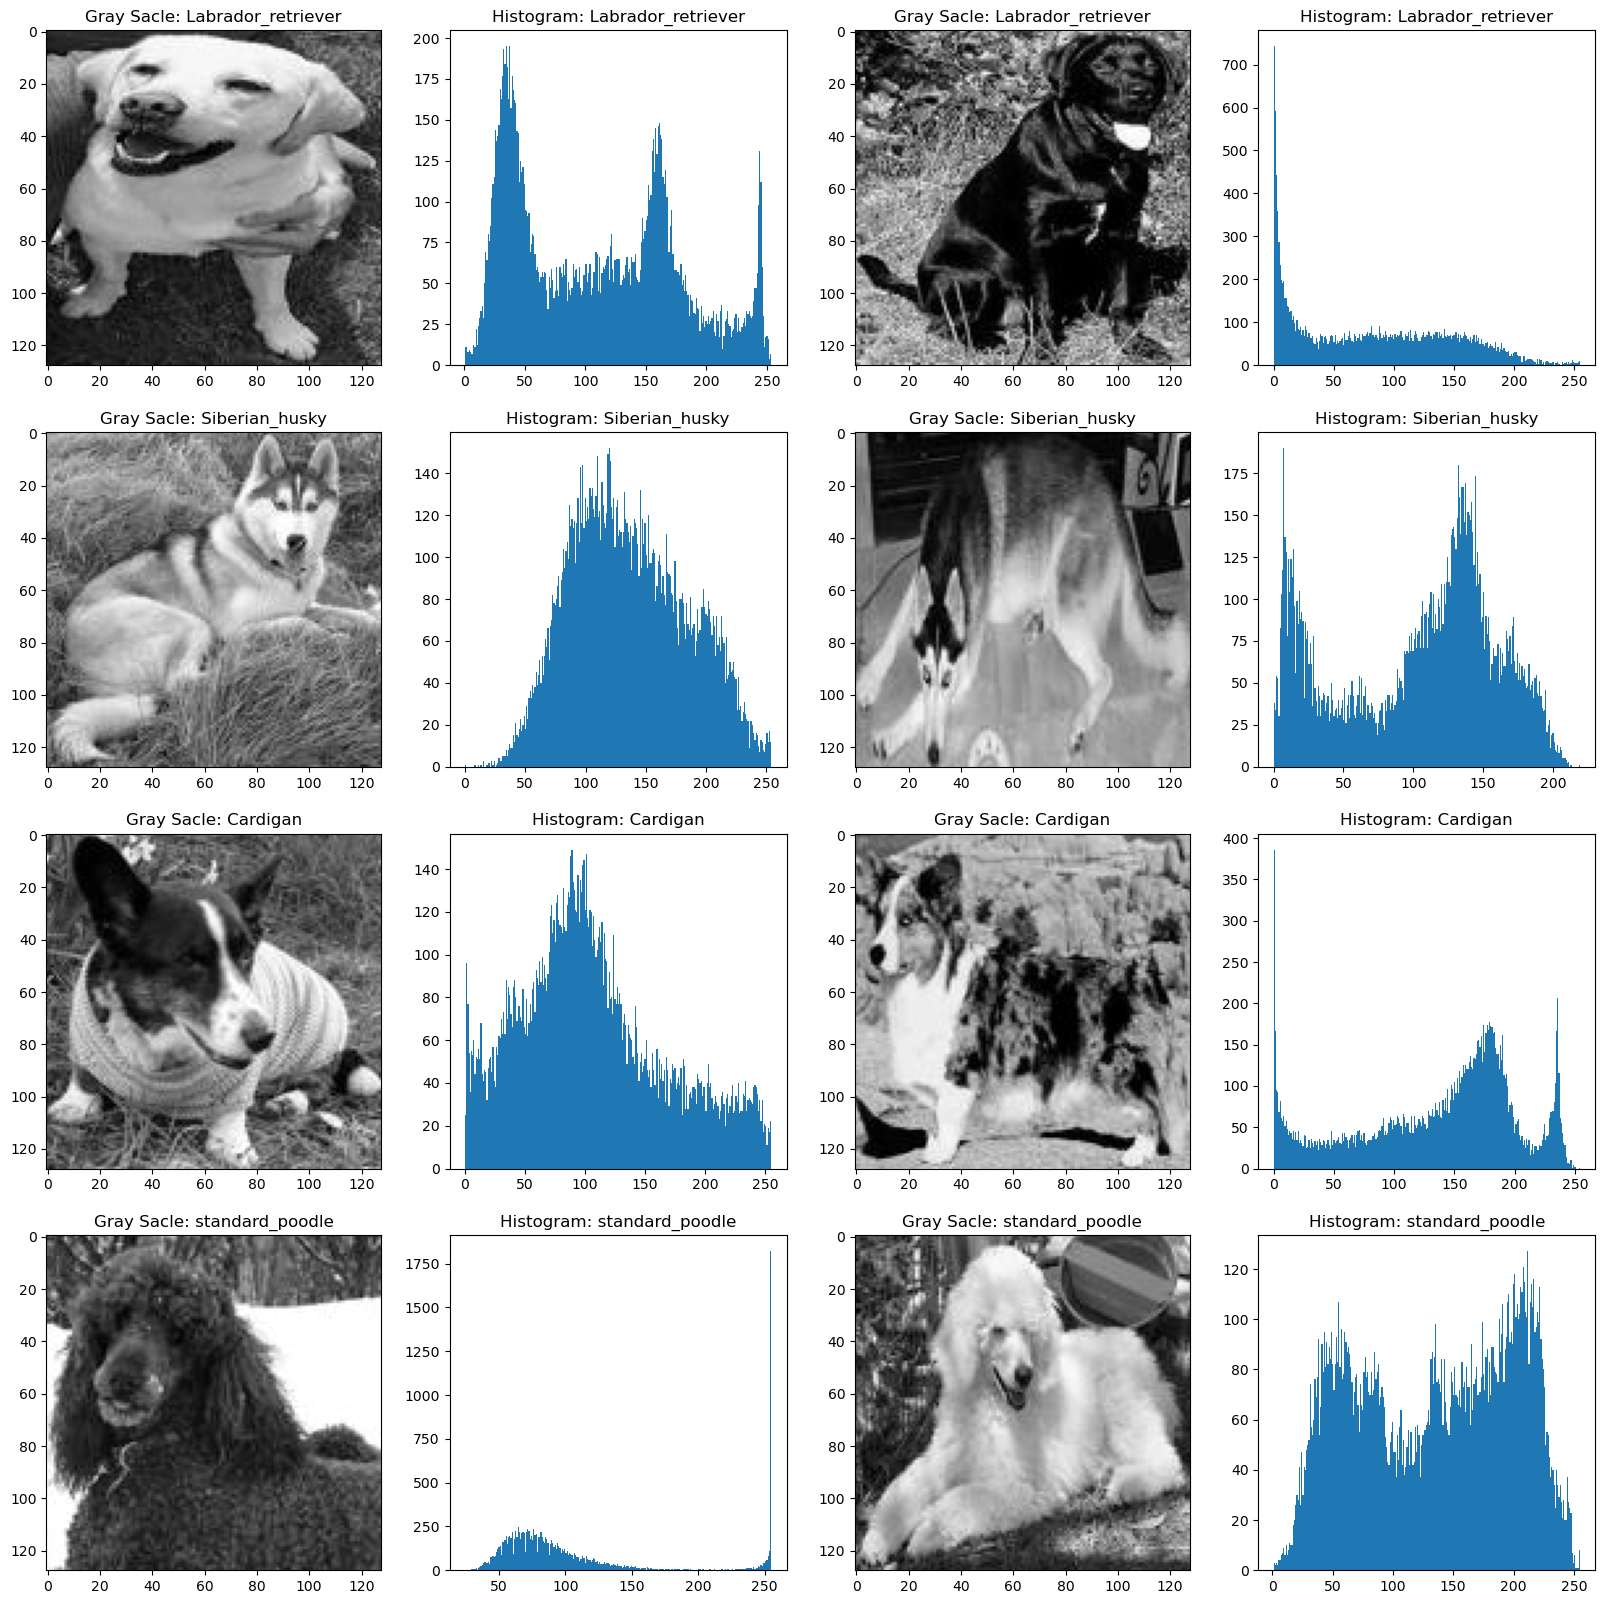

In [74]:
fig, axes = plt.subplots(4,4, figsize=(20,20))
ax = axes.flat
axes_count =0
for i in range(len(resized_images)):
    img = cv.imread(resized_images[i])
    gray_sacle = rgb2gray(img)
    ax[axes_count].imshow(gray_sacle,cmap=plt.cm.gray)
    ax[axes_count+1].hist((gray_sacle*255).reshape(1,128*128)[0],bins=256)
    ax[axes_count].set_title("Gray Sacle: "+resized_images[i].split("\\")[-2].split("-")[-1])
    ax[axes_count+1].set_title("Histogram: "+resized_images[i].split("\\")[-2].split("-")[-1])  
    axes_count+=2
plt.show()

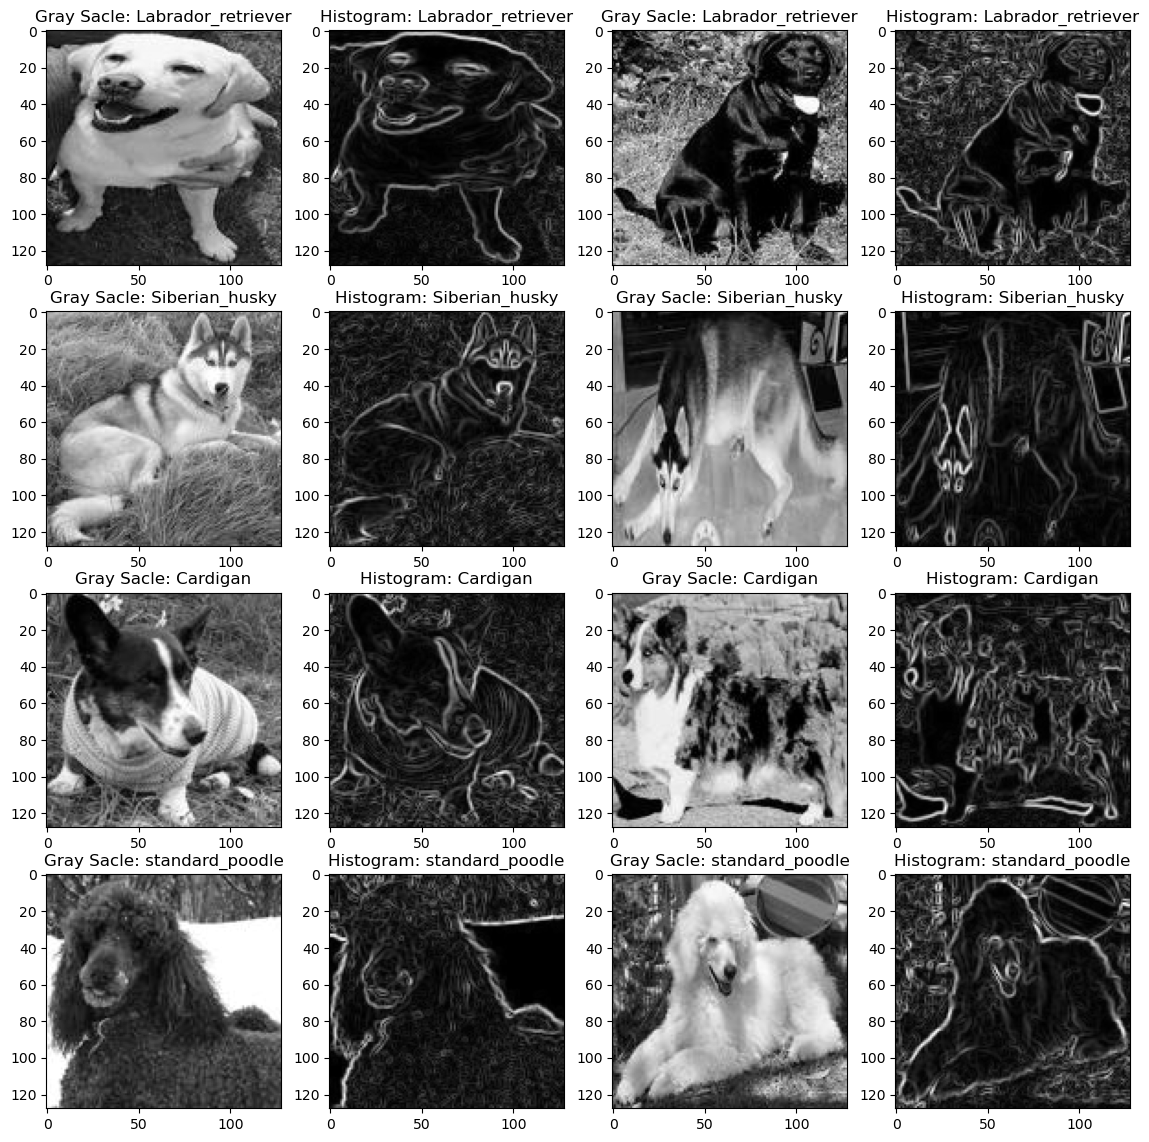

In [80]:
fig, axes = plt.subplots(4,4, figsize=(14,14))
ax = axes.flat
axes_count =0
for i in range(len(resized_images)):
    img = cv.imread(resized_images[i])
    gray_sacle = rgb2gray(img)
    edge_sobel = filters.sobel(gray_sacle)
    ax[axes_count].imshow(gray_sacle,cmap=plt.cm.gray)
    ax[axes_count+1].imshow(edge_sobel,cmap=plt.cm.gray)
    ax[axes_count].set_title("Gray Sacle: "+resized_images[i].split("\\")[-2].split("-")[-1])
    ax[axes_count+1].set_title("Histogram: "+resized_images[i].split("\\")[-2].split("-")[-1])  
    axes_count+=2
plt.show()